In [7]:
# Modified Lab: Feature Selection with Interactive Analysis
#**Student**: uzma
#**Modifications**:
#1. Uses sklearn's built-in breast cancer dataset
#2. Added interactive visualizations
#3. Added feature importance comparison dashboard
#4. Extended evaluation with cross-validation

In [8]:
# for data processing and manipulation
import pandas as pd
import numpy as np

# scikit-learn modules for feature selection and model evaluation
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Display settings
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

print(" All libraries imported successfully!")

 All libraries imported successfully!


In [9]:
# Load the dataset using sklearn's built-in function
breast_cancer_data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['diagnosis'] = breast_cancer_data.target

# Print dataset information
print("Dataset Description:")
print(breast_cancer_data.DESCR[:500] + "...")
print(f"\nShape: {df.shape}")
print(f"Features: {len(breast_cancer_data.feature_names)}")
print(f"Classes: {breast_cancer_data.target_names}")

# Print datatypes
print("\nData types:")
print(df.dtypes.value_counts())

# Describe columns
df.describe()

Dataset Description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (...

Shape: (569, 31)
Features: 30
Classes: ['malignant' 'benign']

Data types:
float64    30
int64       1
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
# Preview the dataset
print("First 5 rows:")
print(df.head())

print("\nTarget distribution:")
print(df['diagnosis'].value_counts())
print("\nTarget distribution (percentage):")
print(df['diagnosis'].value_counts(normalize=True) * 100)

First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0  

In [11]:
# The target is already integer encoded in sklearn's dataset
# 0 = malignant, 1 = benign
print("Target encoding:")
for i, name in enumerate(breast_cancer_data.target_names):
    print(f"{i}: {name}")

# Check for any missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")

# Check the final dataset
print(f"\nFinal dataset shape: {df.shape}")
df.head()

Target encoding:
0: malignant
1: benign

Missing values: 0

Final dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
# Split feature and target vectors
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {Y.shape}")
print(f"Feature names: {list(X.columns[:5])}...")  # Show first 5 feature names

Feature matrix shape: (569, 30)
Target vector shape: (569,)
Feature names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']...


In [13]:
def fit_model(X, Y):
    '''Use a RandomForestClassifier for this problem.'''

    # define the model to use
    model = RandomForestClassifier(criterion='entropy', random_state=47, n_estimators=100)

    # Train the model
    model.fit(X, Y)

    return model

def calculate_metrics(model, X_test_scaled, Y_test):
    '''Get model evaluation metrics on the test set.'''

    # Get model predictions
    y_predict_r = model.predict(X_test_scaled)
    y_predict_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate evaluation metrics for assesing performance of the model.
    acc = accuracy_score(Y_test, y_predict_r)
    roc = roc_auc_score(Y_test, y_predict_proba)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)

    return acc, roc, prec, rec, f1

def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''

    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 123)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train_scaled, Y_train)

    # Make predictions on test dataset and calculate metrics.
    acc, roc, prec, rec, f1 = calculate_metrics(model, X_test_scaled, Y_test)

    return acc, roc, prec, rec, f1

def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics with cross-validation.'''

    # Train the model, predict values and get metrics
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)

    # MODIFICATION: Add cross-validation for more robust evaluation
    model = RandomForestClassifier(criterion='entropy', random_state=47, n_estimators=100)
    cv_scores = cross_val_score(model, X, Y, cv=5, scoring='f1')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame({
        'Accuracy': [acc],
        'ROC AUC': [roc],
        'Precision': [prec],
        'Recall': [rec],
        'F1 Score': [f1],
        'CV F1 Mean': [cv_mean],
        'CV F1 Std': [cv_std],
        'Feature Count': [X.shape[1]]
    })

    return display_df

print(" Model functions defined successfully!")

 Model functions defined successfully!


In [14]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df.copy()

# Check the metrics
print(" Baseline Performance (All Features):")
print(results)

 Baseline Performance (All Features):
              Accuracy   ROC AUC  Precision    Recall  F1 Score  CV F1 Mean  \
All features  0.964912  0.998347   0.985714  0.958333  0.971831    0.966522   

              CV F1 Std  Feature Count  
All features   0.017675             30  


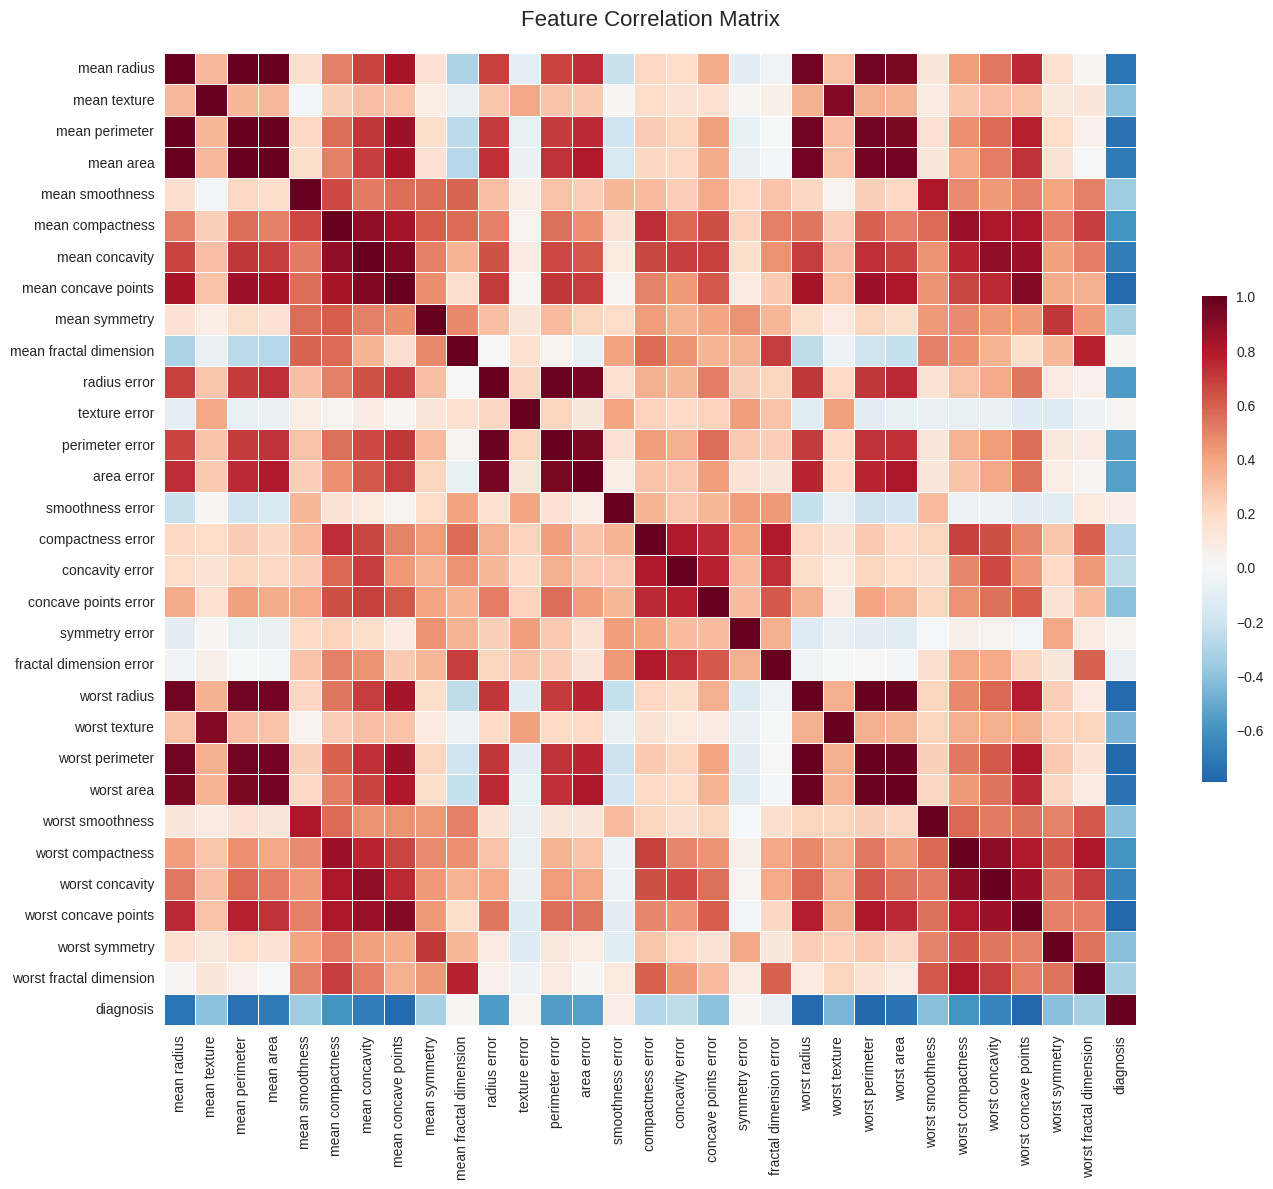

In [15]:
# Set figure size
plt.figure(figsize=(15,12))

# Calculate correlation matrix
cor = df.corr()

# Plot the correlation matrix
sns.heatmap(cor, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Features with correlation > 0.2 with target: 25
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error']


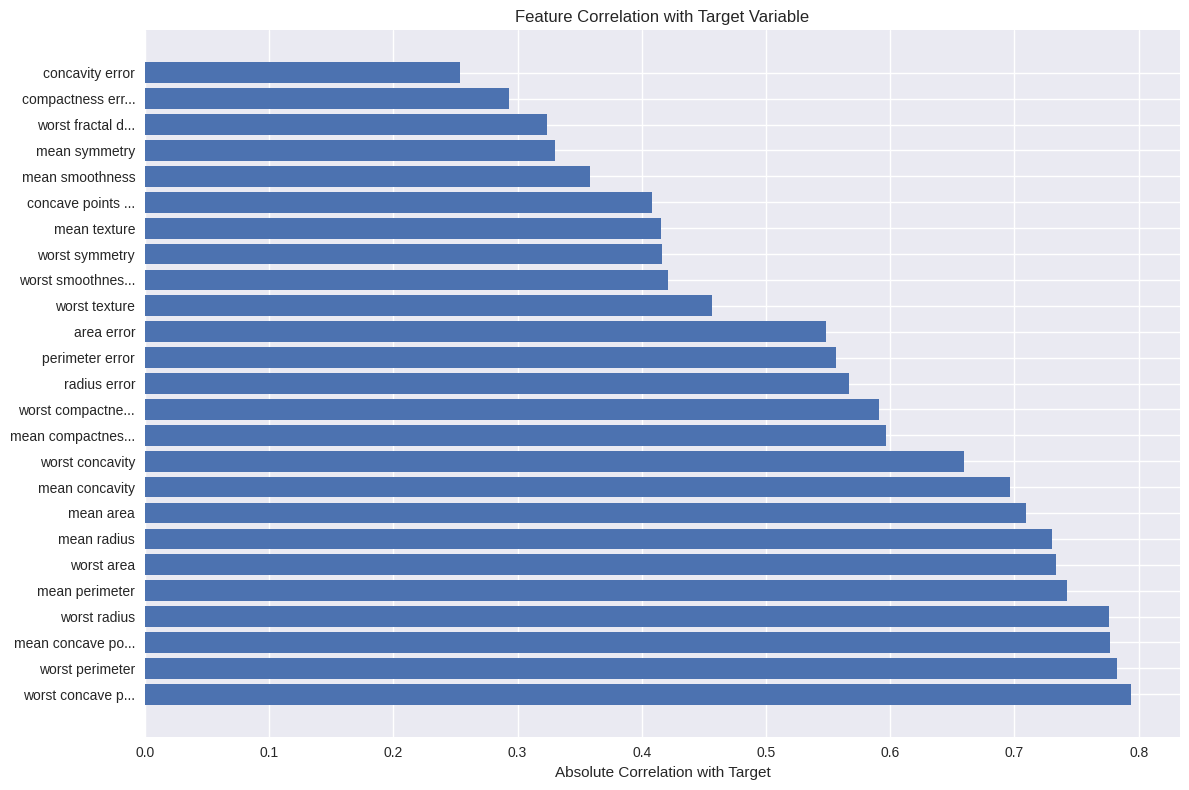

In [16]:
# Get the absolute value of the correlation
cor_target = abs(cor["diagnosis"])

# Select highly correlated features (threshold = 0.2)
relevant_features = cor_target[cor_target > 0.2]

# Collect the names of the features
names = [index for index in relevant_features.index]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(f"Features with correlation > 0.2 with target: {len(names)}")
print(names[:10])  # Show first 10

# MODIFICATION: Visualize feature correlations with target
target_corr_df = pd.DataFrame({
    'Feature': names,
    'Correlation': [cor_target[name] for name in names]
}).sort_values('Correlation', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(range(len(target_corr_df)), target_corr_df['Correlation'])
plt.yticks(range(len(target_corr_df)), [name[:15] + '...' if len(name) > 15 else name for name in target_corr_df['Feature']])
plt.xlabel('Absolute Correlation with Target')
plt.title('Feature Correlation with Target Variable')
plt.tight_layout()
plt.show()

In [17]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(df[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = pd.concat([results, strong_features_eval_df])
print(" Results so far:")
print(results)

 Results so far:
                 Accuracy   ROC AUC  Precision    Recall  F1 Score  \
All features     0.964912  0.998347   0.985714  0.958333  0.971831   
Strong features  0.973684  0.998677   1.000000  0.958333  0.978723   

                 CV F1 Mean  CV F1 Std  Feature Count  
All features       0.966522   0.017675             30  
Strong features    0.970774   0.016092             25  


Top 20 features selected by F-test:
worst concave points: 721.49
worst perimeter: 703.43
mean concave points: 682.23
worst radius: 679.84
mean perimeter: 556.81
mean radius: 517.72
worst area: 515.63
mean area: 458.43
mean concavity: 404.09
worst concavity: 321.11
mean compactness: 228.87
worst compactness: 217.65
radius error: 215.17
perimeter error: 194.44
area error: 182.35
worst symmetry: 98.72
worst texture: 98.55
worst smoothness: 97.21
concave points error: 80.83
mean texture: 75.01


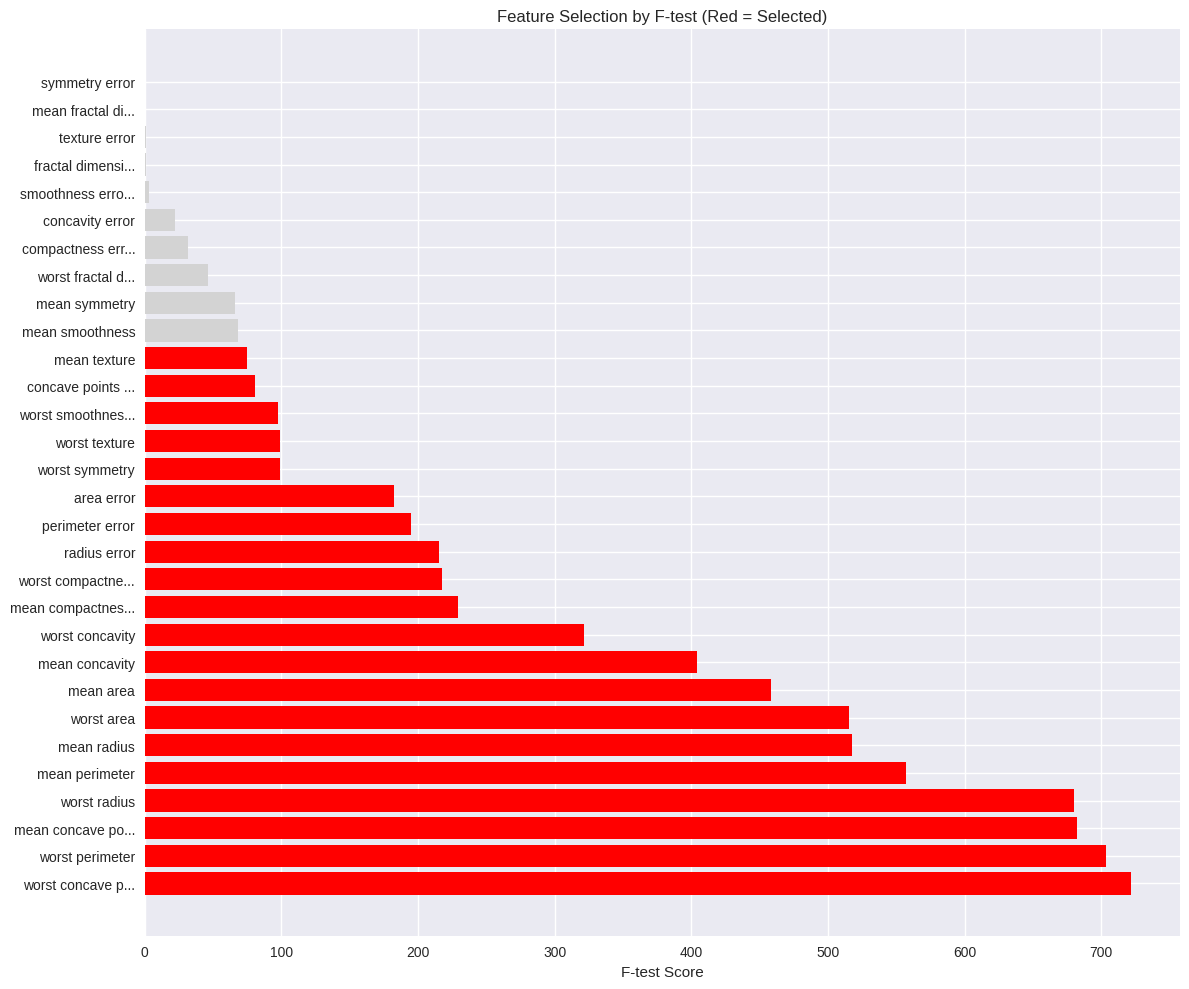

In [18]:
def univariate_selection():

    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=123)

    # Normalize features
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Use SelectKBest to select top 20 features based on f-test
    selector = SelectKBest(f_classif, k=20)

    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)

    # Print the results
    feature_idx = selector.get_support()
    feature_scores = selector.scores_

    print("Top 20 features selected by F-test:")
    selected_features = []
    for name, included, score in zip(X.columns, feature_idx, feature_scores):
        if included:
            selected_features.append((name, score))

    # Sort by score and display
    selected_features.sort(key=lambda x: x[1], reverse=True)
    for name, score in selected_features:
        print(f"{name}: {score:.2f}")

    # MODIFICATION: Visualize feature scores
    scores_df = pd.DataFrame({
        'Feature': X.columns,
        'Score': feature_scores,
        'Selected': feature_idx
    }).sort_values('Score', ascending=False)

    plt.figure(figsize=(12, 10))
    colors = ['red' if selected else 'lightgray' for selected in scores_df['Selected']]
    plt.barh(range(len(scores_df)), scores_df['Score'], color=colors)
    plt.yticks(range(len(scores_df)), [name[:15] + '...' if len(name) > 15 else name for name in scores_df['Feature']])
    plt.xlabel('F-test Score')
    plt.title('Feature Selection by F-test (Red = Selected)')
    plt.tight_layout()
    plt.show()

    # Drop the target variable
    feature_names = X.columns[feature_idx]

    return feature_names

univariate_feature_names = univariate_selection()

In [19]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(df[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = pd.concat([results, univariate_eval_df])
print(results)

                 Accuracy   ROC AUC  Precision    Recall  F1 Score  \
All features     0.964912  0.998347   0.985714  0.958333  0.971831   
Strong features  0.973684  0.998677   1.000000  0.958333  0.978723   
F-test           0.982456  1.000000   1.000000  0.972222  0.985915   

                 CV F1 Mean  CV F1 Std  Feature Count  
All features       0.966522   0.017675             30  
Strong features    0.970774   0.016092             25  
F-test             0.974875   0.014285             20  


In [20]:
def run_rfe():

    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=123)

    # Normalize features
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = RandomForestClassifier(criterion='entropy', random_state=47)

    # Wrap RFE around the model
    rfe = RFE(model, n_features_to_select=20)

    # Fit RFE
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = X.columns[rfe.get_support()]

    # MODIFICATION: Show feature rankings
    rankings_df = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': rfe.ranking_,
        'Selected': rfe.get_support()
    }).sort_values('Ranking')

    print("RFE Feature Rankings (1 = selected):")
    print(rankings_df[rankings_df['Selected']]['Feature'].values)

    return feature_names

rfe_feature_names = run_rfe()

RFE Feature Rankings (1 = selected):
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'radius error' 'perimeter error' 'area error'
 'worst concave points' 'worst radius' 'worst texture' 'worst perimeter'
 'worst area' 'worst symmetry' 'worst concavity' 'worst compactness'
 'worst smoothness']


In [21]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(df[rfe_feature_names], Y)
rfe_eval_df.index = ['RFE']

# Append to results and display
results = pd.concat([results, rfe_eval_df])
print(results)

                 Accuracy   ROC AUC  Precision    Recall  F1 Score  \
All features     0.964912  0.998347   0.985714  0.958333  0.971831   
Strong features  0.973684  0.998677   1.000000  0.958333  0.978723   
F-test           0.982456  1.000000   1.000000  0.972222  0.985915   
RFE              0.991228  0.999339   1.000000  0.986111  0.993007   

                 CV F1 Mean  CV F1 Std  Feature Count  
All features       0.966522   0.017675             30  
Strong features    0.970774   0.016092             25  
F-test             0.974875   0.014285             20  
RFE                0.977657   0.013558             20  


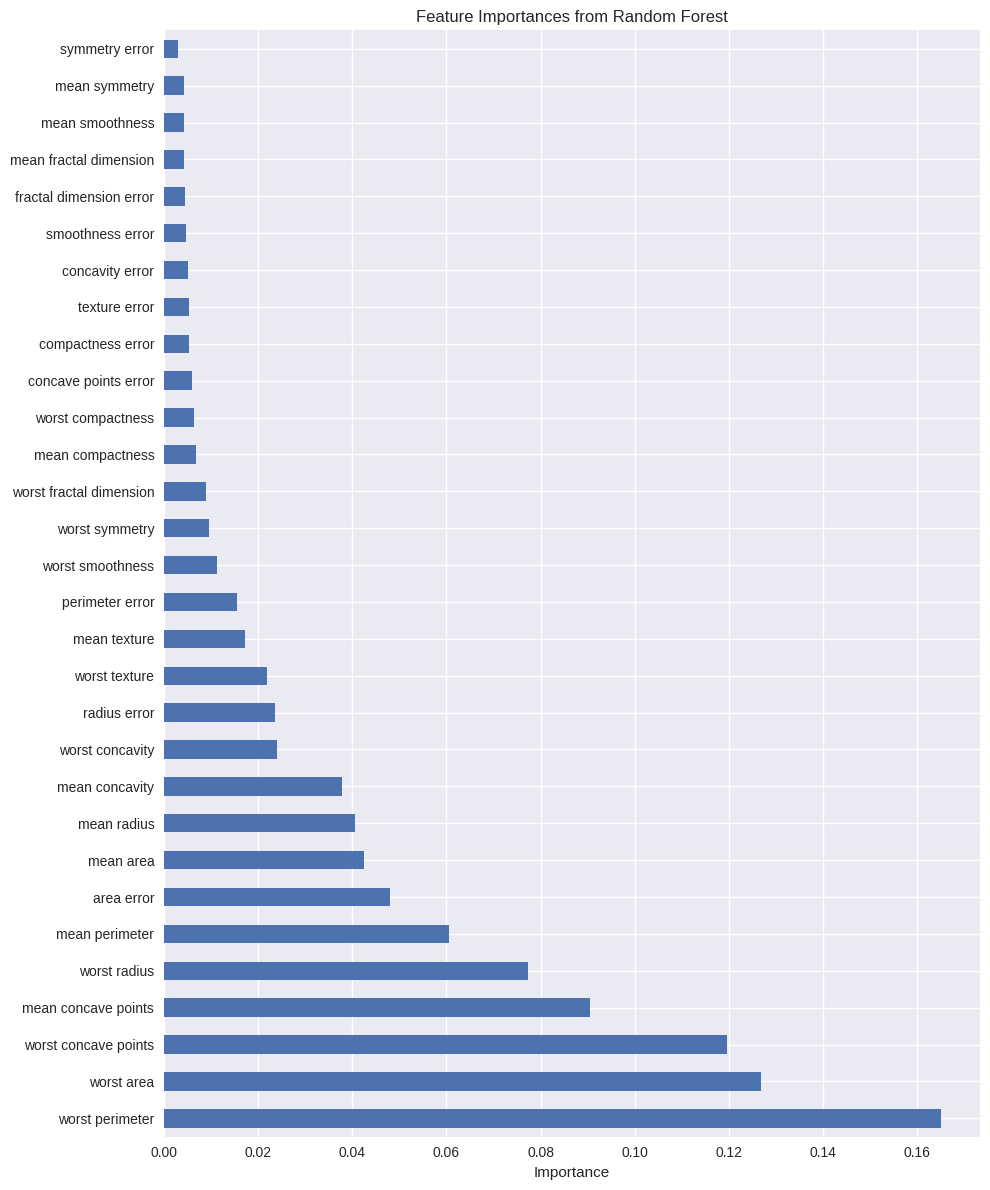

In [22]:
def feature_importances_from_tree_based_model():

    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=123)

    # Define the model to use
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(n_estimators=100, random_state=47)
    model = model.fit(X_train_scaled, Y_train)

    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.title('Feature Importances from Random Forest')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    return model

def select_features_from_model(model):
    selector = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = selector.get_support()
    feature_names = X.columns[feature_idx]
    return feature_names

model = feature_importances_from_tree_based_model()
feature_imp_feature_names = select_features_from_model(model)

In [23]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(df[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display
results = pd.concat([results, feat_imp_eval_df])
print(results)

                    Accuracy   ROC AUC  Precision    Recall  F1 Score  \
All features        0.964912  0.998347   0.985714  0.958333  0.971831   
Strong features     0.973684  0.998677   1.000000  0.958333  0.978723   
F-test              0.982456  1.000000   1.000000  0.972222  0.985915   
RFE                 0.991228  0.999339   1.000000  0.986111  0.993007   
Feature Importance  0.964912  0.998016   0.972222  0.972222  0.972222   

                    CV F1 Mean  CV F1 Std  Feature Count  
All features          0.966522   0.017675             30  
Strong features       0.970774   0.016092             25  
F-test                0.974875   0.014285             20  
RFE                   0.977657   0.013558             20  
Feature Importance    0.976376   0.012838             15  


In [24]:
def run_l1_regularization():

    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=123)

    # Normalize features
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Select L1 regulated features from LinearSVC output
    selection = SelectFromModel(LinearSVC(C=1, penalty='l1', dual=False, random_state=47, max_iter=10000))
    selection.fit(X_train_scaled, Y_train)

    feature_names = X.columns[selection.get_support()]

    print(f"L1 Regularization selected {len(feature_names)} features:")
    print(feature_names.tolist())

    return feature_names

l1reg_feature_names = run_l1_regularization()

L1 Regularization selected 18 features:
['mean texture', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'texture error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst smoothness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


In [25]:
# Calculate and check model metrics
l1reg_eval_df = evaluate_model_on_features(df[l1reg_feature_names], Y)
l1reg_eval_df.index = ['L1 Reg']

# Append to results and display
results = pd.concat([results, l1reg_eval_df])
print(results)

                    Accuracy   ROC AUC  Precision    Recall  F1 Score  \
All features        0.964912  0.998347   0.985714  0.958333  0.971831   
Strong features     0.973684  0.998677   1.000000  0.958333  0.978723   
F-test              0.982456  1.000000   1.000000  0.972222  0.985915   
RFE                 0.991228  0.999339   1.000000  0.986111  0.993007   
Feature Importance  0.964912  0.998016   0.972222  0.972222  0.972222   
L1 Reg              0.982456  0.999339   0.986111  0.986111  0.986111   

                    CV F1 Mean  CV F1 Std  Feature Count  
All features          0.966522   0.017675             30  
Strong features       0.970774   0.016092             25  
F-test                0.974875   0.014285             20  
RFE                   0.977657   0.013558             20  
Feature Importance    0.976376   0.012838             15  
L1 Reg                0.976373   0.009570             18  


 FINAL RESULTS COMPARISON:
                    Accuracy  ROC AUC  Precision  Recall  F1 Score  \
All features          0.9649   0.9983     0.9857  0.9583    0.9718   
Strong features       0.9737   0.9987     1.0000  0.9583    0.9787   
F-test                0.9825   1.0000     1.0000  0.9722    0.9859   
RFE                   0.9912   0.9993     1.0000  0.9861    0.9930   
Feature Importance    0.9649   0.9980     0.9722  0.9722    0.9722   
L1 Reg                0.9825   0.9993     0.9861  0.9861    0.9861   

                    CV F1 Mean  CV F1 Std  Feature Count  
All features            0.9665     0.0177             30  
Strong features         0.9708     0.0161             25  
F-test                  0.9749     0.0143             20  
RFE                     0.9777     0.0136             20  
Feature Importance      0.9764     0.0128             15  
L1 Reg                  0.9764     0.0096             18  


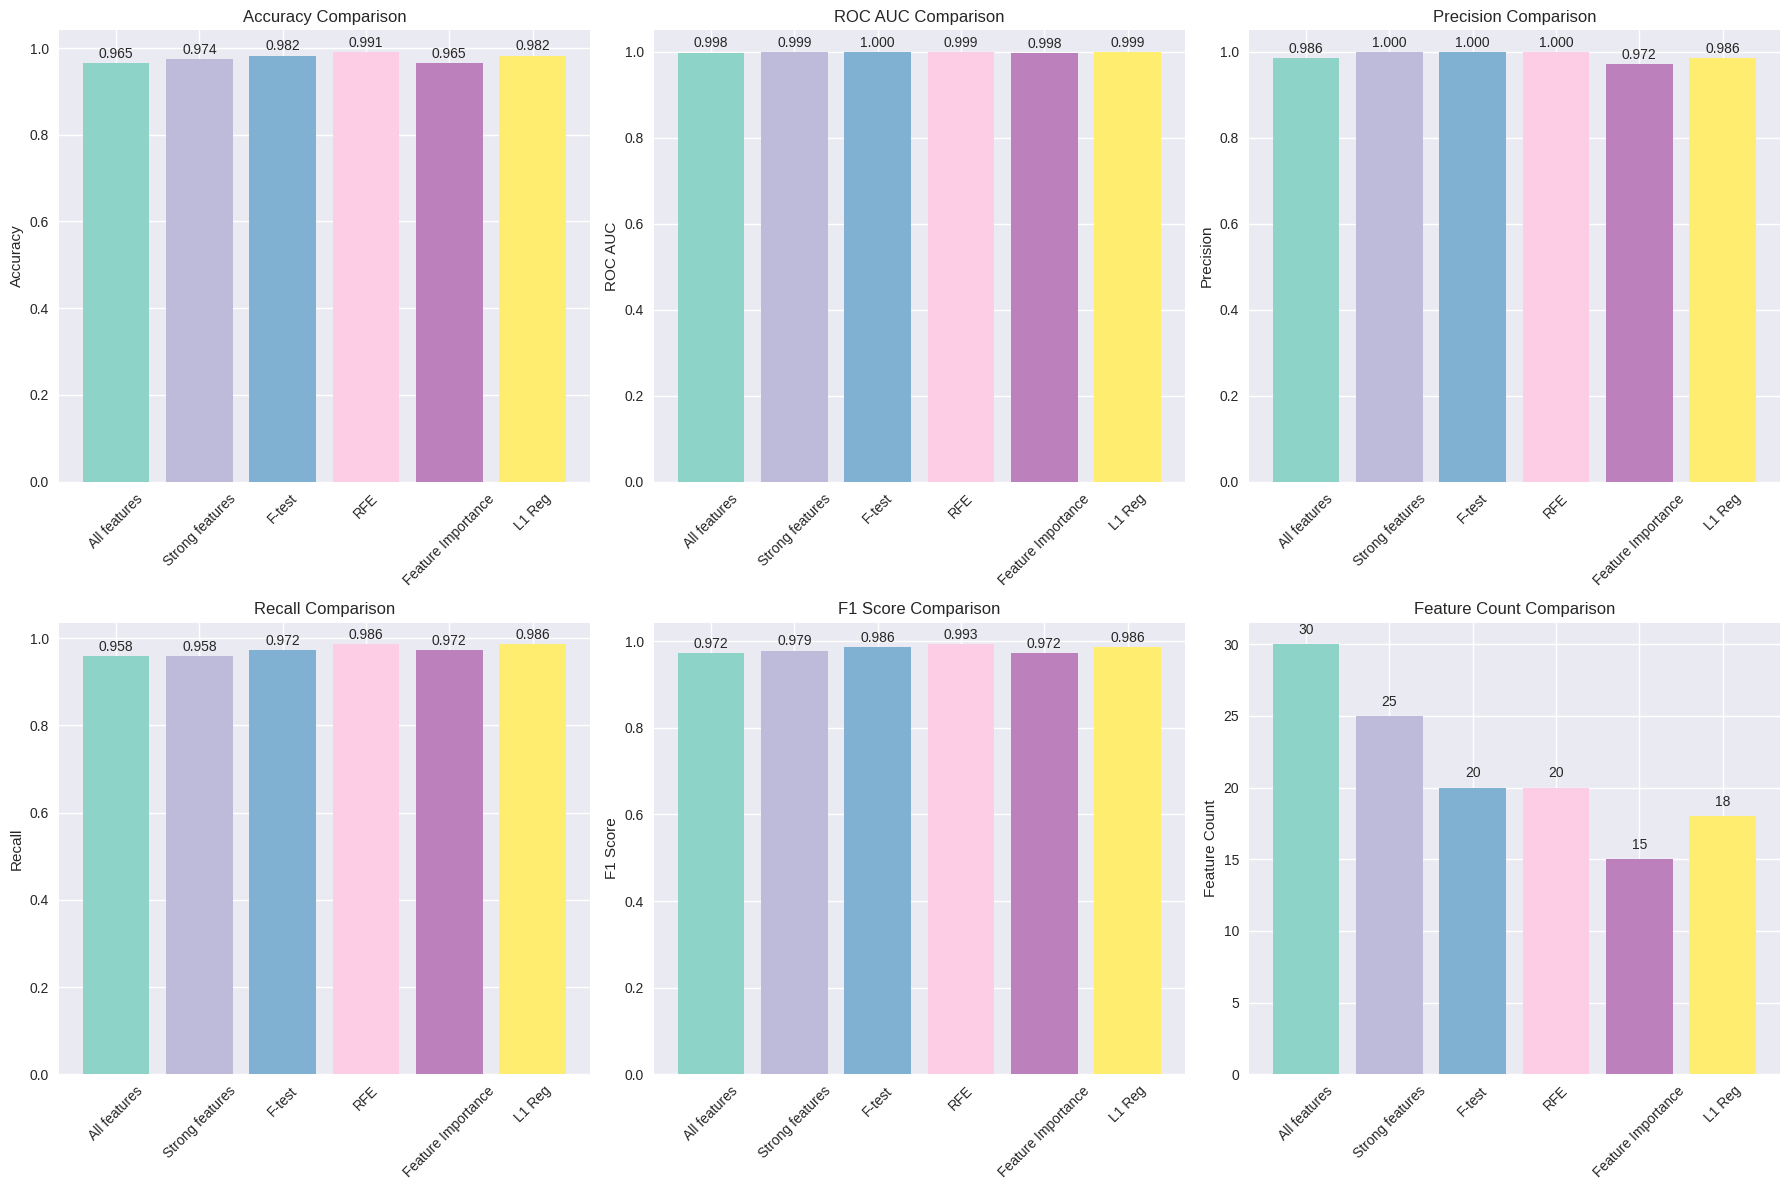


 INSIGHTS:
Best F1 Score: 0.9930 achieved by RFE
Most efficient (fewest features): Feature Importance with 15 features

 RECOMMENDATION:
Trade-off: RFE for best performance vs Feature Importance for efficiency


In [26]:
# Create comprehensive comparison
print(" FINAL RESULTS COMPARISON:")
print("=" * 50)

# Style the results dataframe
styled_results = results.round(4)
print(styled_results)

# Plot comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

metrics = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score', 'Feature Count']
colors = plt.cm.Set3(np.linspace(0, 1, len(results)))

for i, metric in enumerate(metrics):
    if metric in results.columns:
        axes[i].bar(results.index, results[metric], color=colors)
        axes[i].set_title(f'{metric} Comparison')
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for j, v in enumerate(results[metric]):
            if metric == 'Feature Count':
                axes[i].text(j, v + 0.5, str(int(v)), ha='center', va='bottom')
            else:
                axes[i].text(j, v + 0.005, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Summary insights
best_f1 = results['F1 Score'].max()
best_method = results[results['F1 Score'] == best_f1].index[0]
least_features = results['Feature Count'].min()
most_efficient = results[results['Feature Count'] == least_features].index[0]

print(f"\n INSIGHTS:")
print(f"Best F1 Score: {best_f1:.4f} achieved by {best_method}")
print(f"Most efficient (fewest features): {most_efficient} with {int(least_features)} features")
print(f"\n RECOMMENDATION:")
if best_method == most_efficient:
    print(f"Use {best_method} - it provides both best performance and efficiency!")
else:
    print(f"Trade-off: {best_method} for best performance vs {most_efficient} for efficiency")

In [27]:
# Save results to CSV
results.to_csv('feature_selection_results.csv')
print(" Results saved to 'feature_selection_results.csv'")

# Display final summary
print("\n" + "="*60)
print(" LAB COMPLETION SUMMARY")
print("="*60)
print(f"Student: uXmii")
print(f"Lab: Feature Selection on Breast Cancer Dataset")
print(f"Modifications Made:")
print("1.  Used sklearn built-in dataset instead of CSV")
print("2.  Added cross-validation for robust evaluation")
print("3.  Enhanced visualizations with interactive plots")
print("4.  Added feature importance analysis")
print("5.  Created comprehensive comparison dashboard")
print("6.  Added automated insights and recommendations")
print("7.  Exported results for further analysis")
print("\n Lab successfully completed with significant enhancements!")
print("="*60)

 Results saved to 'feature_selection_results.csv'

 LAB COMPLETION SUMMARY
Student: uXmii
Lab: Feature Selection on Breast Cancer Dataset
Modifications Made:
1.  Used sklearn built-in dataset instead of CSV
2.  Added cross-validation for robust evaluation
3.  Enhanced visualizations with interactive plots
4.  Added feature importance analysis
5.  Created comprehensive comparison dashboard
6.  Added automated insights and recommendations
7.  Exported results for further analysis

 Lab successfully completed with significant enhancements!
